## DESAFIO N°2

#### **Integrantes:**
- Rodriguez Juan Martin
- Carsillo Juan Martin
#### **Datasets Elegidos**
1. Airbnb Open Data
2. Breast cancer
3. Canciones populares de Rock en Spotify

#### Importo librerias


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\JUAN\miniconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### **Dataset N°1:** 

In [3]:
df = pd.read_csv("./Data Sets/Airbnb_Open_Data.csv")


C:\Users\JUAN\AppData\Local\Temp\ipykernel_3536\3769458319.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./Data Sets/Airbnb_Open_Data.csv")


In [4]:
df = df.dropna(subset=['host_identity_verified'])
df = df.dropna(subset=['service fee'])
df = df.dropna(subset=['number of reviews'])
df = df.dropna(subset=['neighbourhood group'])


df['service fee'] = df['service fee'].astype(str)
df['service fee'] = df['service fee'].str[1:]
df['service fee'] = df['service fee'].astype(int)

df['number of reviews'] = df['number of reviews'].astype(int)
df['potencial_ingreso_minimo'] = df['service fee'] * df['minimum nights']






SE ANALIZAN LAS SIGUIENTES PREGUNTAS

- ¿Que porcentaje de usuarios verificados hay respecto de los no verificados?
- ¿Que Top 5 de lugares con mas reviews por mes son?
- ¿Cuales son los lugares que si se alquilan ,por el valor de la propiedad , en la minima cantidad de dias que el dueño acepta alquilar la propiedad?



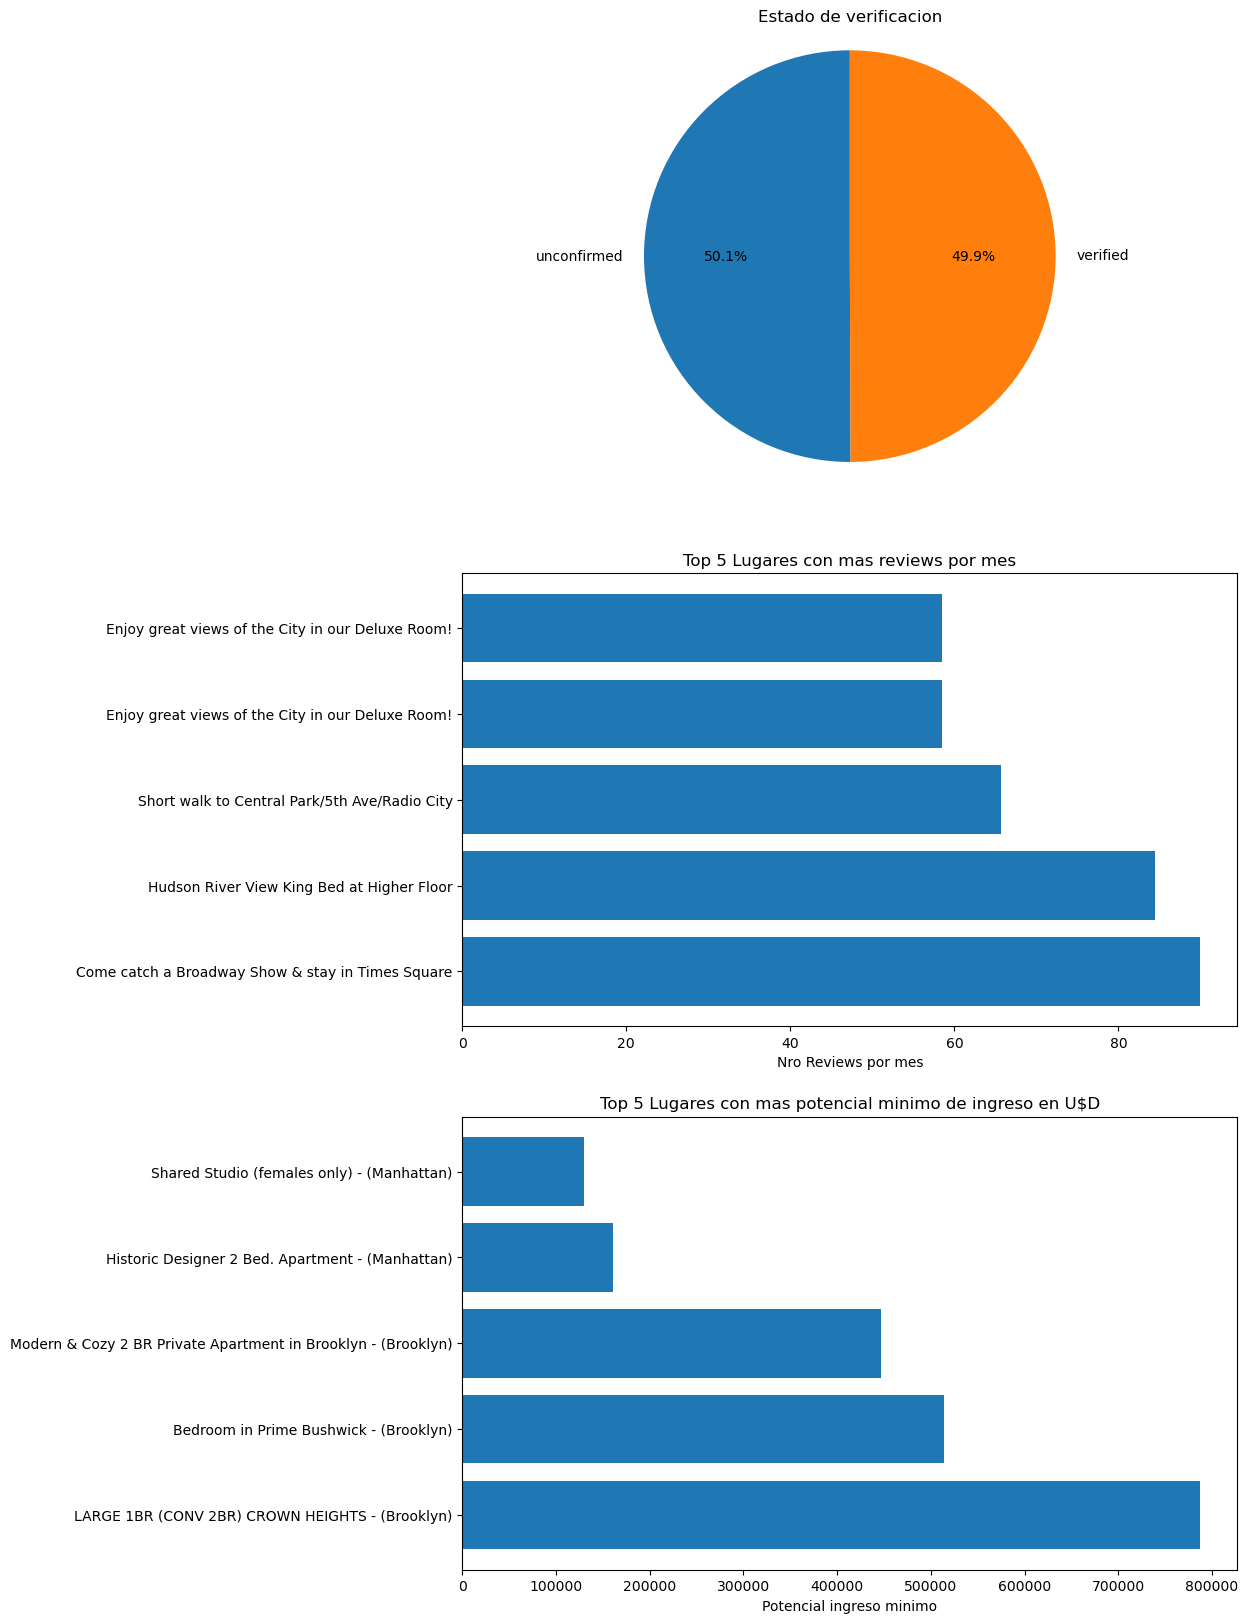

In [5]:
host = df['host_identity_verified']
labels = host.unique()

top_5 = df.sort_values(by=['reviews per month'],ascending=False).head(5) #Top 5 con mas reseñas
labels_top5 = top_5['NAME']
y_pos = np.arange(len(labels_top5))

top_5_pot_ingresos = df.sort_values(by=['potencial_ingreso_minimo'],ascending=False).head(5)
top_5_pot_ingresos['nombre_grafico'] = top_5_pot_ingresos['NAME'] + ' - (' + top_5_pot_ingresos['neighbourhood group'] + ')'

labels2 = top_5_pot_ingresos['nombre_grafico']

y_top = np.arange(len(labels2))

fig1, (ax1,ax2,ax3) = plt.subplots(nrows=3,figsize=(10,20))


ax1.pie(host.value_counts(), labels=labels,autopct='%1.1f%%',startangle=90)
ax1.axis('equal')
ax1.set_title("Estado de verificacion")

ax2.barh(y_pos,top_5['reviews per month'],xerr=0)
ax2.set_yticks(y_pos,labels=labels_top5)
ax2.set_xlabel('Nro Reviews por mes')
ax2.set_title('Top 5 Lugares con mas reviews por mes')

ax3.barh(y_pos,top_5_pot_ingresos['potencial_ingreso_minimo'],xerr=0)
ax3.set_yticks(y_top,labels=labels2)
ax3.set_xlabel('Potencial ingreso minimo')
ax3.set_title('Top 5 Lugares con mas potencial minimo de ingreso en U$D')

plt.show()





Un resultado curioso es que las 3 propiedades donde mas potencial de ingreso tienen es en Brooklyn, lo cual lleva a otra pregunta y la principal del Dataset:

- ¿Cual es el barrio con mas potencial de ganar dinero y facilidad de alquilar para invertir en propiedades? ¿Es Brooklyn?

SE ANALIZA, POR BARRIO, PROMEDIO DE HONORARIOS Y COMISIONES Y LA SUMA TOTAL DE REVIEWS

Las preguntas son:

- ¿Que barrio es el que, en promedio, tiene mas cargos?
- ¿Que barrio es el que tiene mas cantidad de reviews hechas?

(167.0, 1182260.0)

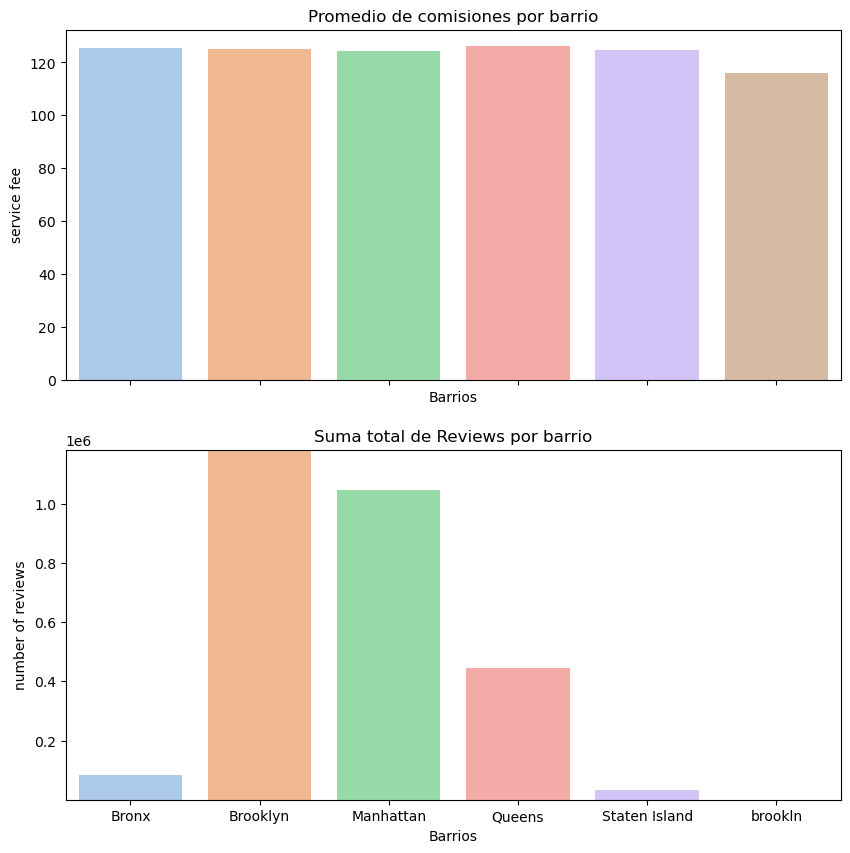

In [6]:
comisionPorBarrio = df[['neighbourhood group','service fee']]
reviewsPorBarrio = df[['neighbourhood group','number of reviews']]

comisionPorBarrio = comisionPorBarrio.groupby('neighbourhood group').mean().reset_index()
reviewsPorBarrio = reviewsPorBarrio.groupby('neighbourhood group').sum().reset_index()


barrios = comisionPorBarrio['neighbourhood group']
xticks = np.arange(len(barrios))
f, (ax1,ax2) = plt.subplots(2,1,figsize=(10,10),sharex=True)


ax1.set_title('Promedio de comisiones por barrio')
sns.barplot(data=comisionPorBarrio,x='neighbourhood group',y='service fee',palette="pastel",ax=ax1) 
ax1.set_xlabel('Barrios')
ax1.set_xticks(xticks,labels=barrios)

ax2.set_title('Suma total de Reviews por barrio')
sns.barplot(data=reviewsPorBarrio,x='neighbourhood group',y='number of reviews',palette="pastel",ax=ax2) 
ax2.set_xlabel('Barrios')
ax2.set_ylim(reviewsPorBarrio['number of reviews'].min(),reviewsPorBarrio['number of reviews'].max())



- ¿Que barrio es el que, en promedio, tiene mas cargos? **Queens**
- ¿Que barrio es el que tiene mas cantidad de reviews hechas? **Brooklyn**

ANALIZANDO LA DISTRIBUCION DE LOS HONORARIOS



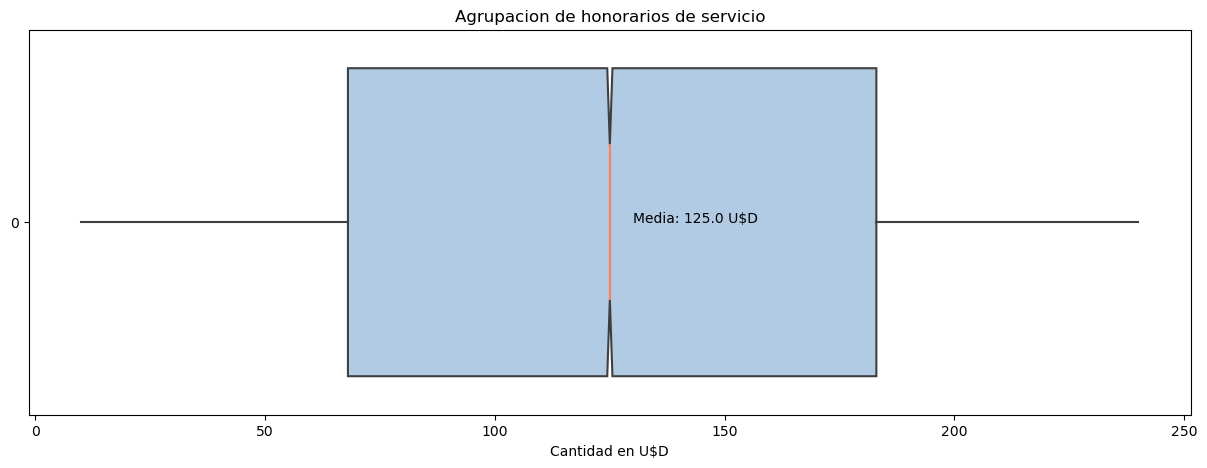

In [7]:
f, (ax1) = plt.subplots(figsize=(15,5))

median = 'Media: ' + str(df['service fee'].median()) + ' U$D'

sns.boxplot(data=df['service fee'],notch=True, showcaps=False,flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"},orient='h')
ax1.annotate(text=median, xy=(130,-0.0))
ax1.set_title('Agrupacion de honorarios de servicio')
ax1.set_xlabel('Cantidad en U$D')

plt.show()

# Cantidad de alquileres por barrio

<BarContainer object of 6 artists>

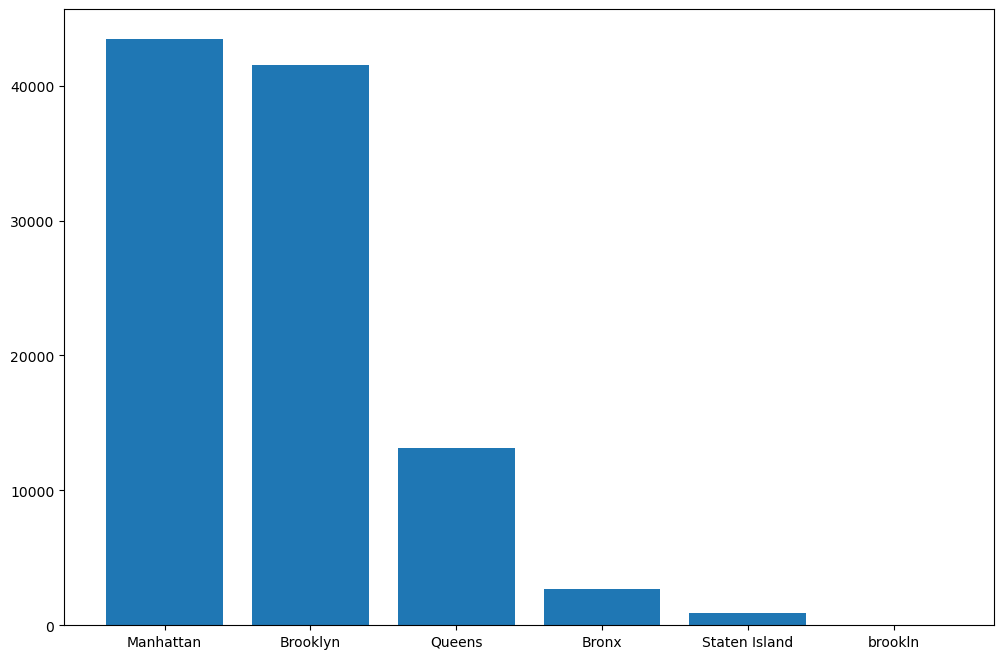

In [8]:
import numpy as np
grupoBarrios = df['neighbourhood group'].value_counts()

fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(grupoBarrios.index,grupoBarrios,label='Bandas con mas canciones en el top')



En este gráfico observamos la gran diferencia que hay entre Manhattan y Brooklyn con respecto a los otros barrios. Esto puede hacer referencia al estilo de los barrios, siendo estos dos, barrios Turísticos.

# Tipo de habitación por barrio

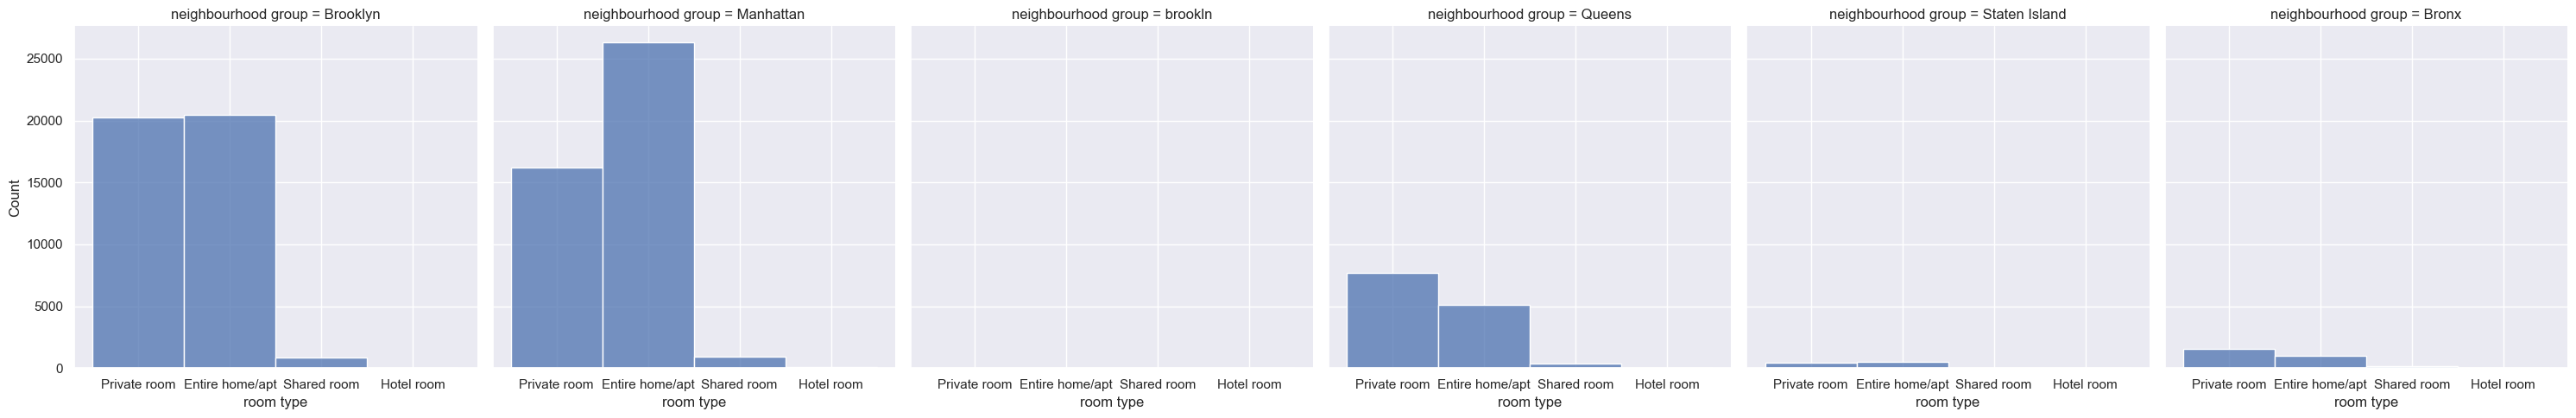

In [40]:

sns.set_theme(style="darkgrid")
sns.displot(
    df, x="room type", col="neighbourhood group",
    binwidth=5, height=5, facet_kws=dict(margin_titles=True),
)

En todos los barrios se puede observar un predominio tanto de las habitaciones privadas como las casas o apartamentos. Podemos notar como la gente prefiere tener más privacidad, a la hora de vacacionar. También prefieren no utilizar esta plataforma para alquilar habitaciones de hoteles.